In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#file_path = "D:/Data_Analyst_Quantium/"
dataset = pd.read_csv("QVI_data.csv")

In [10]:
dataset.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [13]:
loyalty_card_distribution = dataset['LYLTY_CARD_NBR'].value_counts()
loyalty_card_stats = loyalty_card_distribution.describe()
print(loyalty_card_stats)

count    72636.000000
mean         3.646043
std          2.630133
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         18.000000
Name: count, dtype: float64


In [16]:
lifestage_distribution = dataset['LIFESTAGE'].value_counts()
print(lifestage_distribution)

LIFESTAGE
OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48594
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64


<ipython-input-23-a33ba07489e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lifestage_distribution.index, y=lifestage_distribution.values, palette="viridis")


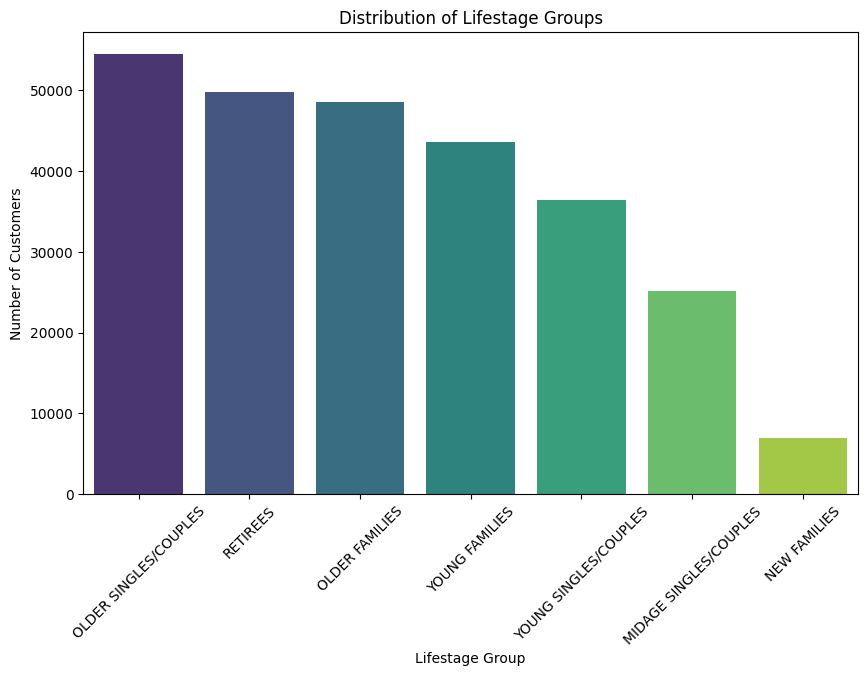

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=lifestage_distribution.index, y=lifestage_distribution.values, palette="viridis")
plt.xlabel('Lifestage Group')
plt.ylabel('Number of Customers')
plt.title('Distribution of Lifestage Groups')
plt.xticks(rotation=45)
plt.show()

In [25]:
PREMIUM_CUSTOMER_distribution = dataset['PREMIUM_CUSTOMER'].value_counts()
print(PREMIUM_CUSTOMER_distribution)

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69689
Name: count, dtype: int64


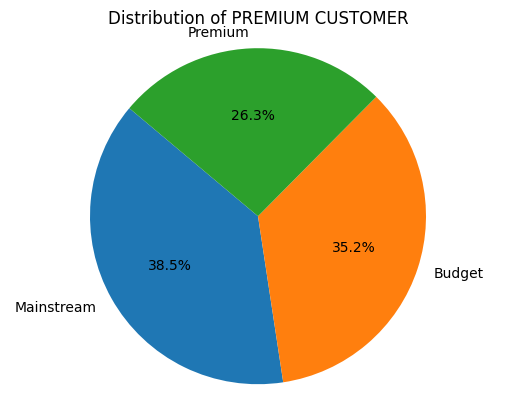

In [29]:
plt.pie(PREMIUM_CUSTOMER_distribution, labels=PREMIUM_CUSTOMER_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Đảm bảo hình tròn không bị méo
plt.title('Distribution of PREMIUM CUSTOMER')
plt.show()

In [ ]:
prod_sales = dataset.groupby('PROD_NAME')['TOT_SALES'].sum()
print(prod_sales)

PROD_NAME
Burger Rings 220g                         6831.0
CCs Nacho Cheese    175g                  5961.9
CCs Original 175g                         6048.0
CCs Tasty Cheese    175g                  6069.0
Cheetos Chs & Bacon Balls 190g            9243.3
                                           ...  
WW Sour Cream &OnionStacked Chips 160g    5323.8
WW Supreme Cheese   Corn Chips 200g       5390.3
Woolworths Cheese   Rings 190g            5169.6
Woolworths Medium   Salsa 300g            4050.0
Woolworths Mild     Salsa 300g            4234.5
Name: TOT_SALES, Length: 114, dtype: float64


In [35]:
average_quantity = dataset.groupby('PROD_NAME')['PROD_QTY'].mean().reset_index()
average_quantity.columns = ['PROD_NAME', 'Average Quantity']
df = dataset.merge(average_quantity, on='PROD_NAME')
print(df)

        LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0                 1000  2018-10-17          1       1         5   
1                 1024  2019-02-20          1      31         5   
2                 1150  2019-04-14          1     176         5   
3                 1314  2019-02-13          1     357         5   
4                 1501  2018-08-07          1     581         5   
...                ...         ...        ...     ...       ...   
264829          272183  2019-03-25        272  269891        34   
264830          272207  2019-05-29        272  269922        34   
264831          272209  2019-06-18        272  269932        34   
264832          272290  2018-10-22        272  270048        34   
264833          272355  2019-01-07        272  270152        34   

                                     PROD_NAME  PROD_QTY  TOT_SALES  \
0       Natural Chip        Compny SeaSalt175g         2        6.0   
1       Natural Chip        Compny SeaSalt175g       

In [36]:
brand_counts = dataset['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'Count']
print(brand_counts)

         BRAND  Count
0       KETTLE  41288
1       SMITHS  31823
2      DORITOS  28145
3     PRINGLES  25102
4          RRD  17779
5   WOOLWORTHS  14757
6    INFUZIONS  14201
7        THINS  14075
8         COBS   9693
9     TOSTITOS   9471
10    TWISTIES   9454
11         OLD   9324
12     GRNWVES   7740
13     NATURAL   7469
14    TYRRELLS   6442
15    CHEEZELS   4603
16         CCS   4551
17    SUNBITES   3008
18     CHEETOS   2927
19      BURGER   1564
20      FRENCH   1418


In [39]:
brand_performance = df.groupby('BRAND')['TOT_SALES'].agg(['sum', 'mean']).reset_index()
brand_performance.columns = ['BRAND', 'Total Sales', 'Average Sales']
print(brand_performance)

         BRAND  Total Sales  Average Sales
0       BURGER       6831.0       4.367647
1          CCS      18078.9       3.972512
2      CHEETOS      16884.5       5.768534
3     CHEEZELS      40029.9       8.696481
4         COBS      70569.8       7.280491
5      DORITOS     240590.9       8.548264
6       FRENCH       7929.0       5.591678
7      GRNWVES      51617.2       6.668889
8    INFUZIONS      99047.6       6.974692
9       KETTLE     390239.8       9.451652
10     NATURAL      42318.0       5.665819
11         OLD      90785.1       9.736712
12    PRINGLES     177655.5       7.077344
13         RRD      95046.0       5.345970
14      SMITHS     224660.2       7.059680
15    SUNBITES       9676.4       3.216888
16       THINS      88852.5       6.312789
17    TOSTITOS      79789.6       8.424623
18    TWISTIES      81522.1       8.623027
19    TYRRELLS      51647.4       8.017293
20  WOOLWORTHS      49343.6       3.343742


In [40]:
combined_performance = brand_counts.merge(brand_performance, on='BRAND')

print(combined_performance)

         BRAND  Count  Total Sales  Average Sales
0       KETTLE  41288     390239.8       9.451652
1       SMITHS  31823     224660.2       7.059680
2      DORITOS  28145     240590.9       8.548264
3     PRINGLES  25102     177655.5       7.077344
4          RRD  17779      95046.0       5.345970
5   WOOLWORTHS  14757      49343.6       3.343742
6    INFUZIONS  14201      99047.6       6.974692
7        THINS  14075      88852.5       6.312789
8         COBS   9693      70569.8       7.280491
9     TOSTITOS   9471      79789.6       8.424623
10    TWISTIES   9454      81522.1       8.623027
11         OLD   9324      90785.1       9.736712
12     GRNWVES   7740      51617.2       6.668889
13     NATURAL   7469      42318.0       5.665819
14    TYRRELLS   6442      51647.4       8.017293
15    CHEEZELS   4603      40029.9       8.696481
16         CCS   4551      18078.9       3.972512
17    SUNBITES   3008       9676.4       3.216888
18     CHEETOS   2927      16884.5       5.768534


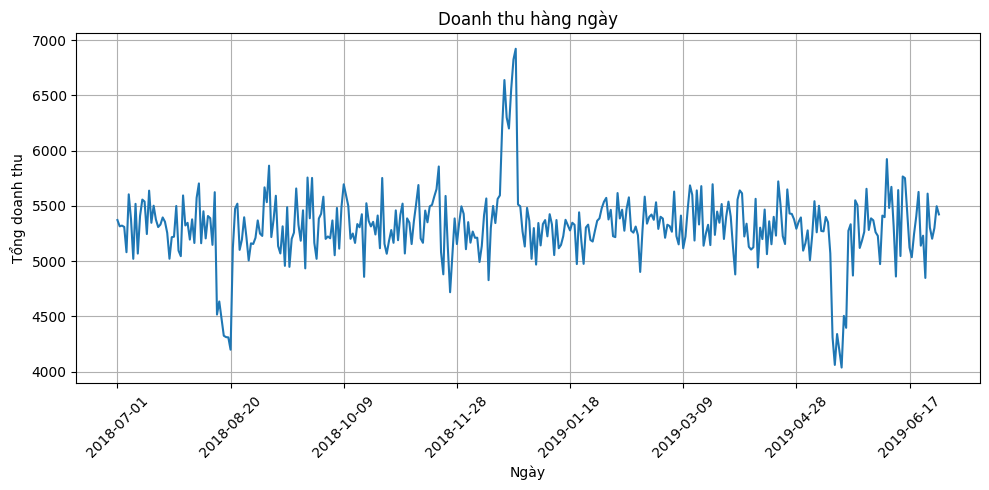

In [43]:
daily_sales = df.groupby('DATE')['TOT_SALES'].sum()

# Vẽ biểu đồ doanh thu theo ngày
plt.figure(figsize=(10, 5))
daily_sales.plot(kind='line')
plt.title('Doanh thu hàng ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng doanh thu')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])
dataset['Month'] = dataset['DATE'].dt.month
dataset['Year'] = dataset['DATE'].dt.year

<Figure size 800x2000 with 0 Axes>

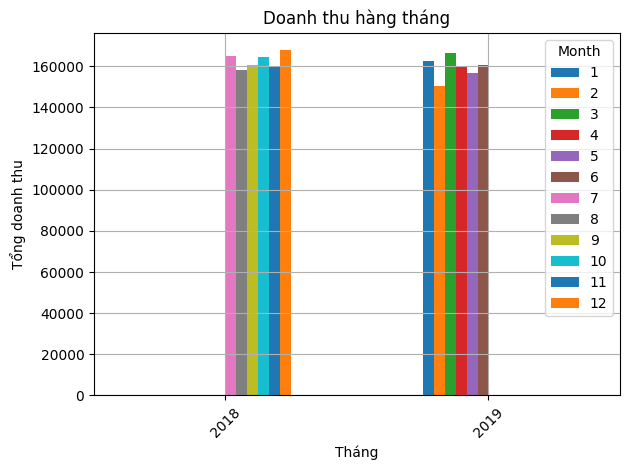

In [63]:

monthly_sales = dataset.groupby(['Year', 'Month'])['TOT_SALES'].sum().unstack()

# Vẽ biểu đồ doanh thu theo tháng
plt.figure(figsize=(8, 20))
monthly_sales.plot(kind='bar')
plt.title('Doanh thu hàng tháng')
plt.xlabel('Tháng')
plt.ylabel('Tổng doanh thu')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()